<h2>Logistic Regression</h2>


In [2]:
import tensorflow as tf
import pandas as pd
import numpy as np
import time
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


In [32]:
iris = load_iris()
iris_X, iris_y = iris.data[:-1,:], iris.target[:-1]
iris_y= pd.get_dummies(iris_y).values
trainX, testX, trainY, testY = train_test_split(iris_X, iris_y, test_size=0.33, random_state=42)

In [33]:
#numfeatures is the number of features in the input data
numFeatures = trainX.shape[1]
numFeatures

4

In [34]:
#numlabels is the number of classes our data points can be
numLabels = trainY.shape[1]

numLabels

3

In [41]:
#placeholders
#'None' means tensorflow shouldn;t expect  a fixed number in that dimension
X = tf.placeholder(tf.float32,[None,numFeatures])

yGold = tf.placeholder(tf.float32,[None,numLabels])

yGold

<tf.Tensor 'Placeholder_17:0' shape=(?, 3) dtype=float32>

In [46]:
W = tf.Variable(tf.zeros([4,3]))
b = tf.Variable(tf.zeros([3]))


In [52]:
weights = tf.Variable(tf.random_normal([numFeatures,numLabels],
                                       mean=0,
                                       stddev=0.01,
                                       name="weights"))
bias = tf.Variable(tf.random_normal([1,numLabels],
                                    mean= 0,
                                    stddev = 0.01,
                                    name = "bias"))


In [53]:
apply_weights_OP = tf.matmul(X,weights,name = "apply_weights")
add_bias_OP = tf.add(apply_weights_OP , bias, name = "add_bias")
activation_OP = tf.nn.sigmoid(add_bias_OP, name = "activation")

In [63]:
numEpochs = 700
# decayed_learning_rate = learning_rate *
#                         decay_rate ^ (global_step / decay_steps)
learningRate = tf.train.exponential_decay(learning_rate = 0.0008,
                                         global_step =1,
                                         decay_steps = trainX.shape[0],
                                         decay_rate = 0.95,
                                         staircase = True)
learningRate

<tf.Tensor 'ExponentialDecay_9:0' shape=() dtype=float32>

In [66]:
#defining cost function
cost_OP = tf.nn.l2_loss(activation_OP-yGold, name="squared_error_cost")

#defining Gradient Descent
training_OP = tf.train.GradientDescentOptimizer(learningRate).minimize(cost_OP)


In [67]:
sess = tf.Session()

#initialize our weights and variables.
init_OP = tf.global_variables_initializer()
sess.run(init_OP)

In [76]:
# argmax(activation_OP, 1) returns the label with the most probability
# argmax(yGold, 1) is the correct label
correct_predictions_OP = tf.equal(tf.argmax(activation_OP,1),tf.argmax(yGold,1))

# If every false prediction is 0 and every true prediction is 1, the average returns us the accuracy
accuracy_OP = tf.reduce_mean(tf.cast(correct_predictions_OP, "float"))

# Summary op for regression output
activation_summary_OP = tf.summary.histogram("output", activation_OP)

# Summary op for accuracy
accuracy_summary_OP = tf.summary.scalar("accuracy", accuracy_OP)

# Summary op for cost
cost_summary_OP = tf.summary.scalar("cost", cost_OP)
activation_summary_OP

# Summary ops to check how variables (W, b) are updating after each iteration
weightSummary = tf.summary.histogram("weights", weights.eval(session=sess))
biasSummary = tf.summary.histogram("biases", bias.eval(session=sess))

# Merge all summaries
merged = tf.summary.merge([activation_summary_OP, accuracy_summary_OP, cost_summary_OP, weightSummary, biasSummary])

# Summary writer
writer = tf.summary.FileWriter("summary_logs", sess.graph)

writer

In [93]:
#intializing
cost = 0
diff =1
epoch_values = []
accuracy_values = []
cost_values = []

# Training epochs
for i in range(numEpochs):
    if i > 1 and diff < .0001:
        print("change in cost %g; convergence."% diff)
        break
    else:
        # Run training step
        step = sess.run(training_OP, feed_dict={X: trainX, yGold: trainY})
        # Report occasional stats
        if i % 10== 0:
            # Add epoch to epoch_values
            epoch_values.append(i)
            # Generate accuracy stats on test data
            train_accuracy, newCost = sess.run([accuracy_OP, cost_OP], feed_dict={X: trainX, yGold: trainY})
            # Add accuracy to live graphing variable
            accuracy_values.append(train_accuracy)
            # Add cost to live graphing variable
            cost_values.append(newCost)
            # Re-assign values for variables
            diff = abs(newCost - cost)
            cost = newCost

            #generate print statements
            print("step %d, training accuracy %g, cost %g, change in cost %g"%(i, train_accuracy, newCost, diff))


# How well do we perform on held-out test data?
print("final accuracy on test set: %s" %str(sess.run(accuracy_OP, 
                                                     feed_dict={X: testX, 
                                                                yGold: testY})))


step 0, training accuracy 0.949495, cost 11.2869, change in cost 11.2869
step 10, training accuracy 0.949495, cost 11.2844, change in cost 0.00243092
step 20, training accuracy 0.949495, cost 11.282, change in cost 0.00242519
step 30, training accuracy 0.949495, cost 11.2796, change in cost 0.00241756
step 40, training accuracy 0.949495, cost 11.2772, change in cost 0.00240993
step 50, training accuracy 0.949495, cost 11.2748, change in cost 0.00240421
step 60, training accuracy 0.949495, cost 11.2724, change in cost 0.00239563
step 70, training accuracy 0.949495, cost 11.27, change in cost 0.002388
step 80, training accuracy 0.949495, cost 11.2676, change in cost 0.00238228
step 90, training accuracy 0.949495, cost 11.2652, change in cost 0.00237274
step 100, training accuracy 0.949495, cost 11.2629, change in cost 0.00236797
step 110, training accuracy 0.949495, cost 11.2605, change in cost 0.00235939
step 120, training accuracy 0.949495, cost 11.2582, change in cost 0.00235271
step 

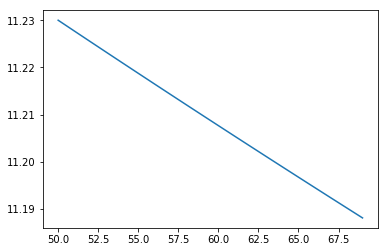

In [107]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.plot([np.mean(cost_values[i-50:i]) for i in range(len(cost_values))])
plt.show()